In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import os

# Download dataset
dataset_path = kagglehub.dataset_download("matepapava/nike-discounts-dataset")

# List files inside the dataset
print("Files:", os.listdir(dataset_path))

# Load the JSON file (updated from CSV)
df = pd.read_json(f"{dataset_path}/nike_discounts.json")

print(df.head())

Using Colab cache for faster access to the 'nike-discounts-dataset' dataset.
Files: ['nike_discounts.json']
  color_description                created_at  current_price  discount_amount  \
0       Multi-Color 2025-11-24 15:12:25+00:00          29.97            15.03   
1    Magic Flamingo 2025-11-24 15:12:16+00:00          19.97             6.03   
2       Blue Beyond 2025-11-24 15:12:16+00:00          19.97             6.03   
3         Echo Pink 2025-11-24 15:11:46+00:00          25.97             6.03   
4              Doll 2025-11-24 15:11:46+00:00          25.97             6.03   

   discount_percent group_key  \
0              33.0    kmmH6T   
1              23.0  Q0QJYbl4   
2              23.0  Q0QJYbl4   
3              18.0  irWOLkEz   
4              18.0  irWOLkEz   

                                           image_url             messaging  \
0  https://static.nike.com/a/images/t_default/u_1...  Extra 25% w/ BFRIDAY   
1  https://static.nike.com/a/images/t_default/a82.

ANALYSIS:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Stats:")
print(df.describe())


Shape: (1000, 21)

Columns: Index(['color_description', 'created_at', 'current_price', 'discount_amount',
       'discount_percent', 'group_key', 'image_url', 'messaging',
       'original_price', 'price', 'price_display', 'product_code',
       'product_type', 'product_url', 'promo_display', 'promo_message',
       'source_url', 'subtitle', 'target', 'title', 'badge'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   color_description  1000 non-null   object             
 1   created_at         1000 non-null   datetime64[ns, UTC]
 2   current_price      1000 non-null   float64            
 3   discount_amount    1000 non-null   float64            
 4   discount_percent   1000 non-null   float64            
 5   group_key          1000 non-null   object             
 6  

Correlation Matrix + Heatmap

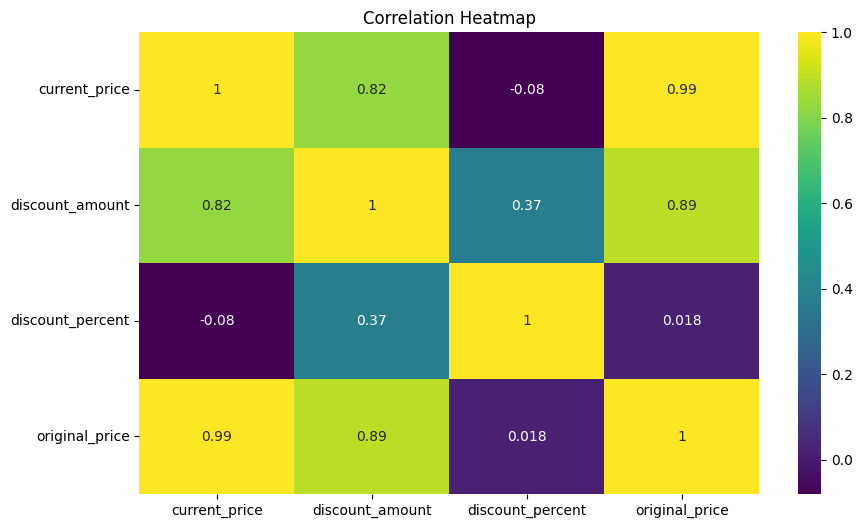

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


Price vs Discount Scatter Plot

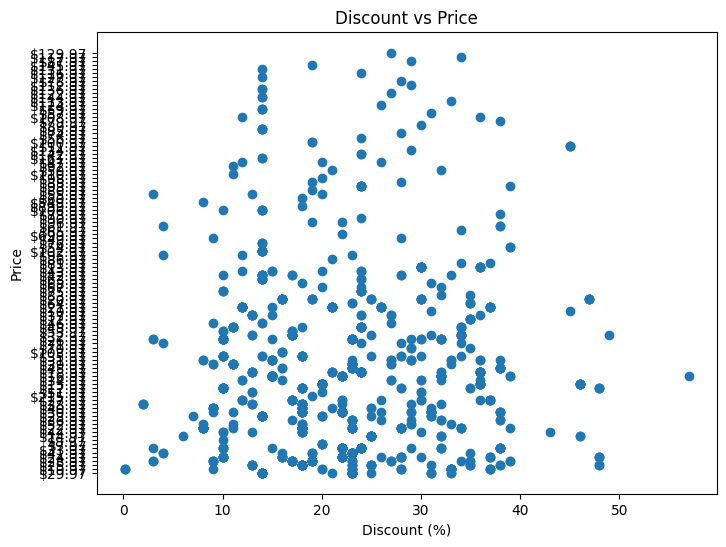

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df["discount_percent"], df["price"])
plt.xlabel("Discount (%)")
plt.ylabel("Price")
plt.title("Discount vs Price")
plt.show()

Distribution of Discounts

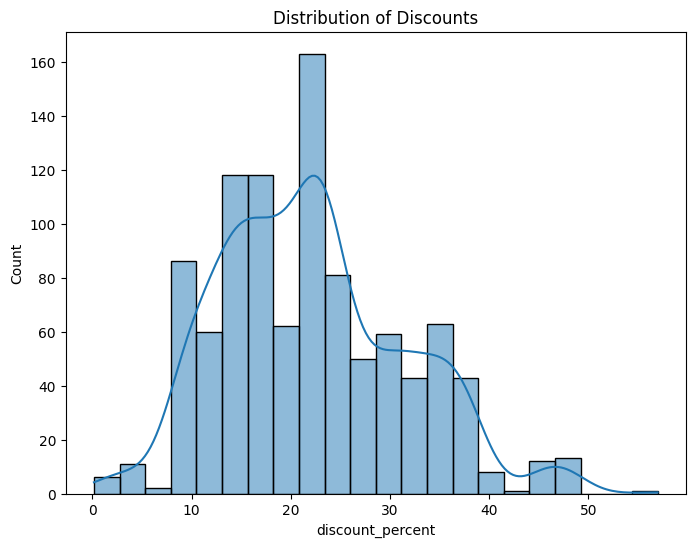

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(df["discount_percent"], kde=True)
plt.title("Distribution of Discounts")
plt.show()

Distribution of Prices

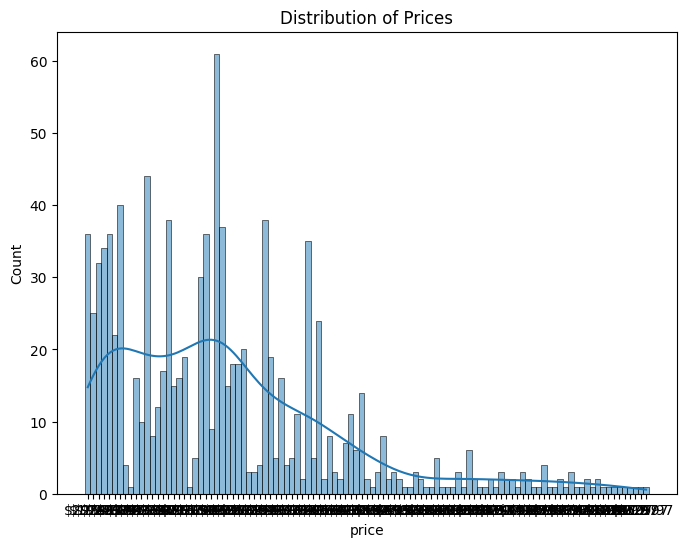

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df["price"], kde=True)
plt.title("Distribution of Prices")
plt.show()


Outlier Detection Using Boxplots

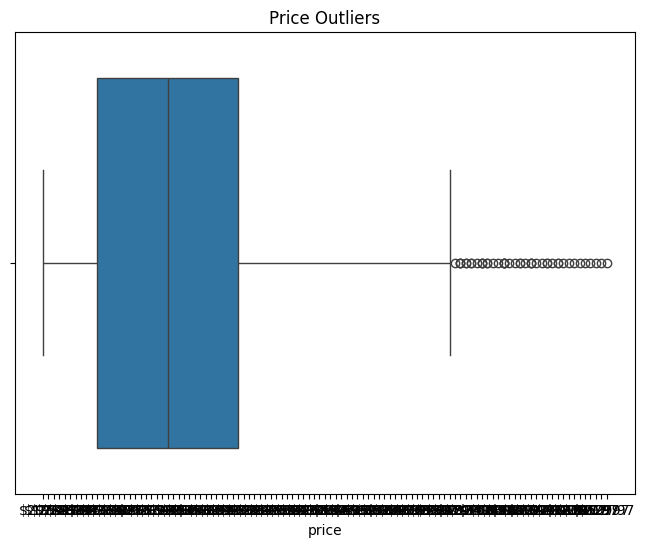

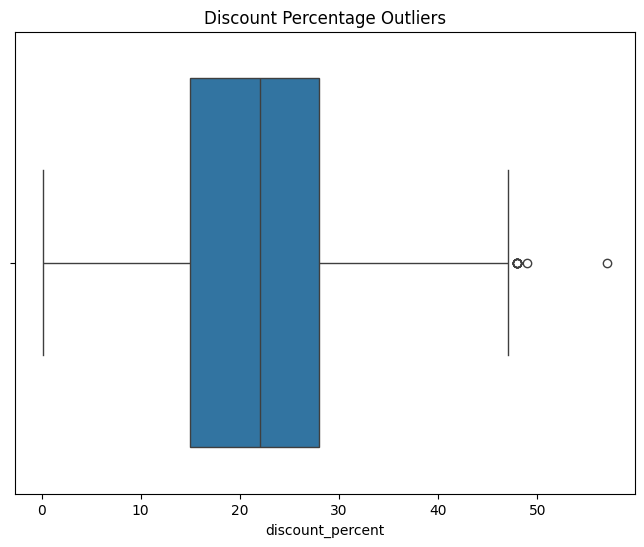

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["price"])
plt.title("Price Outliers")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df["discount_percent"])
plt.title("Discount Percentage Outliers")
plt.show()

Average Price by Category (if dataset has categories)

In [16]:
if "category" in df.columns:
    plt.figure(figsize=(12,6))
    df.groupby("category")["price"].mean().sort_values().plot(kind="bar")
    plt.title("Average Price by Category")
    plt.show()


Correlation Between Discount & Final Price

In [19]:
# Clean the 'price' column: remove '$' and convert to float
df['price_cleaned'] = df['price'].astype(str).str.replace('$', '', regex=False).astype(float)

corr = df["discount_percent"].corr(df["price_cleaned"])
print("Correlation Between Discount and Price:", corr)

Correlation Between Discount and Price: -0.08033082974555773
